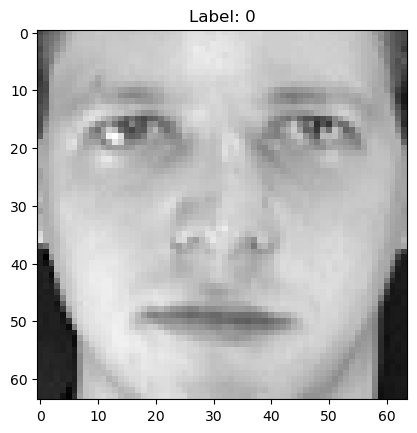

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


# Veri setini yükleme
data = fetch_olivetti_faces()
images, labels = data.images, data.target

# İlk yüz görüntüsünü görselleştirme
plt.imshow(images[0], cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.show()

In [3]:
# 2. Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(
    data.data, labels, test_size=0.2, random_state=42
)

In [5]:
# 3. PCA ile Boyut Azaltma
pca = PCA(n_components=100, whiten=True, random_state=42)  # 100 bileşen seçiyoruz
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
# 4. SVM Modeli Eğitme
svm = SVC(kernel='linear', random_state=42)  # Doğrusal çekirdek kullanıyoruz
svm.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

In [17]:
# 5. Modelin Performansını Değerlendirme
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

In [11]:
print("SVM Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

SVM Model Accuracy: 96.25%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      

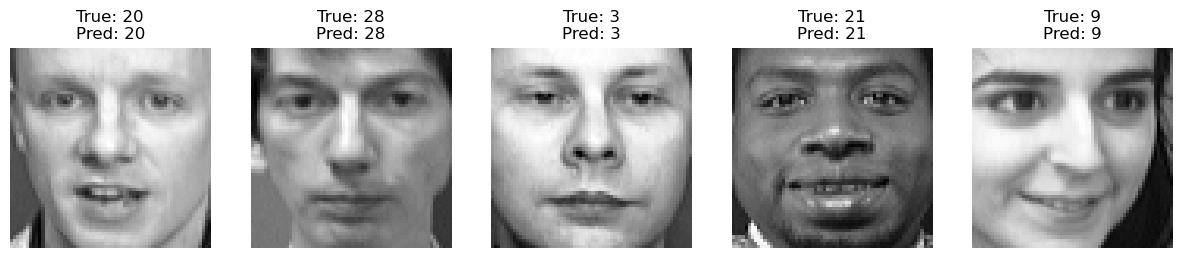

In [13]:
# 6. Rastgele Görüntüler ve Tahminleri Görselleştirme
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.show()

In [19]:
import joblib


# Modeli kaydetme
model_face_recognition = 'svm_model.joblib'  # Kaydedilecek model dosyasının adı
joblib.dump(svm, model_face_recognition)
print(f"Model '{model_face_recognition}' başarıyla kaydedildi.")

Model 'svm_model.joblib' başarıyla kaydedildi.
